# Requirement 1

The given data set (consolidated_coin_data.csv) contains information on the Consolidated financial information for the top 10 cryptocurrencies by market cap (Currency name, Date, Open, High, Low, Close, Volume, Marketcap). This dataset is pulled from CoinMarketCap.com. From the given data I intend to generate a plot that details change in the “High” value for all the currencies over time and also plot a graph depicting the “Volume” by currency between 2016 and 2019 for the top 3 Currencies.

All this data will be explored appropriately and explained using the most suitable programmatic representation as per the requirements. With the use of the given dataset I have represented the information by identifying the best type of visualization for 17-35-year olds and 60+ age groups. This data is further represented using the most suitable visualisation as per my judgement which is line chart and area chart. There is a difference between the fonts used for both age groups, the 60+ age group has a font of 17 for easy viewing.

Using the above given data I identified the changes in the “High” value for all the Currencies over time. I used two plots and two subplot's for visualizing this data for 17-35-year olds and 60+ age groups. I used bright colour and slightly bigger size than normal size text (size:14) for 17-35-year olds and I used specific soft (muted)colours and big texts (size: 17) for 60+ age groups, I choose specific colours for visualisation which is most suitable for seniors. I did a good research to select the most suitable colours, based upon which I avoided using blue colour in the visualization for 60+ age group as it is proven that many people have difficulty with the colour. I mainly considered age groups requirements and colour theory for both age group.

The given dataset consisted a lot of information which required proper evaluation before its use in order to get the desired outcome. After checking the data all the attributes were in objective format so in order to achieve the output the attribute date required to be changed to date format and the attributes high and volume needed to be changed to float format. The data cleaning was done of the dataset and made usable.

In order to achieve the solution to requirement 2, we needed 3 attributes from the dataset (currency, date, high) so I grouped currency and date attributes and took the sum of high attribute. Now for a better visualization and simplification of the data I rearranged the data using pivot. Using a line chart I depicted the achieved information about all the currencies over the time but as some of the data was not easily decipherable hence created a subplot showing individual currencies over time for better understanding.

Now for achieving solution to requirement 3 initially I crosschecked whether the top 3 currencies are same for the entire dataset as well as the ones dating from 2016-2019. The conclusion was that the top3 currencies are same in both the cases they are bitcoin, tether and ethereum. After this for further processing the data from 2016 to 2019 was filtered then using pivot rearranged the data into a more simplified dataset and used the data for the identified top 3 currencies mentioned above. Using this information created the visualization using a line chart for 17-35yrs age group and area chart for 60+yrs age group.

# Solution to Requirement 2 

Importing libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from operator import itemgetter

Reading data from CSV file

In [77]:
coin_df = pd.read_csv("consolidated_coin_data.csv")

Printing data

('\n': to go to next line, '/t': for giving tab space)

In [78]:
print('\n__________________________________________________________________________________')
print("\n \t \t \t **** DATA **** \n \n", coin_df, "\n") 
print('____________________________________________________________________________________')


__________________________________________________________________________________

 	 	 	 **** DATA **** 
 
          Currency          Date  Open  High   Low Close      Volume  \
0           tezos  Dec 04, 2019  1.29  1.32  1.25  1.25  46,048,752   
1           tezos  Dec 03, 2019  1.24  1.32  1.21  1.29  41,462,224   
2           tezos  Dec 02, 2019  1.25  1.26   1.2  1.24  27,574,097   
3           tezos  Dec 01, 2019  1.33  1.34  1.25  1.25  24,127,567   
4           tezos  Nov 30, 2019  1.31  1.37  1.31  1.33  28,706,667   
...           ...           ...   ...   ...   ...   ...         ...   
28939  bitcoin-sv  May 02, 2013  3.78  4.04  3.01  3.37           0   
28940  bitcoin-sv  May 01, 2013  4.29  4.36  3.52   3.8           0   
28941  bitcoin-sv  Apr 30, 2013   4.4  4.57  4.17   4.3           0   
28942  bitcoin-sv  Apr 29, 2013  4.37  4.57  4.23  4.38           0   
28943  bitcoin-sv  Apr 28, 2013   4.3   4.4  4.18  4.35           0   

        Market Cap  
0      824,588,

Printing Data Type

In [79]:
print('\n_________________________________________________________')
print("\n **** DATA TYPE **** \n \n", coin_df.dtypes , "\n") 
print('_________________________________________________________')


_________________________________________________________

 **** DATA TYPE **** 
 
 Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object 

_________________________________________________________


#### Preparing data 

Dropping null value columns to avoid errors 

In [80]:
coin_df.dropna(inplace = True) 

Removing commas with 'regex=True' for substrings replacement

In [81]:
coin_df = coin_df.replace(',', '', regex=True)

converting data type using astype to float

In [82]:
coin_df["High"]= coin_df["High"].astype(float)

converting data types using 'astype' to date

In [83]:
coin_df["Date"] = coin_df["Date"].astype('datetime64')

converting data types using astype to float and replace all Zeros

In [84]:
coin_df['Volume'] = coin_df['Volume'].replace('0', np.nan).astype(float)

Printing to compare

In [85]:
print('\n_________________________________________________________')
print("\n  **** DATA TYPE **** \n \n", coin_df.dtypes , "\n") 
print('_________________________________________________________')


_________________________________________________________

  **** DATA TYPE **** 
 
 Currency              object
Date          datetime64[ns]
Open                  object
High                 float64
Low                   object
Close                 object
Volume               float64
Market Cap            object
dtype: object 

_________________________________________________________


Grouping by Currency, Date and taking sum of 'High'

In [86]:
gb_currency = coin_df.groupby(['Currency','Date'])[['High']].sum()
gb_currency.reset_index(inplace=True)

Printing it to make sure there is no error

In [87]:
print('\n_________________________________________________________')
print("\n \t **** DATA **** \n \n", gb_currency.head() , "\n") 
print('___________________________________________________________')


_________________________________________________________

 	 **** DATA **** 
 
        Currency       Date  High
0  binance-coin 2013-04-28  4.40
1  binance-coin 2013-04-29  4.57
2  binance-coin 2013-04-30  4.57
3  binance-coin 2013-05-01  4.36
4  binance-coin 2013-05-02  4.04 

___________________________________________________________


Using 'pivot' to rearrange data for more convenient way to access.

In [88]:
high_value_changes = gb_currency.pivot(index ='Date', columns ='Currency', values ='High')

## For 17-35-year olds

The graph below depicts the changes in the high value for all the currencies over time. This visualization is created keeping in mind the audience between 17-35yrs of age. The colours are bright and the font size is 14. There are 12 currencies each depicted with different colour are shown in the graph. For a better understanding of the values of individual currencies there are individual graphs shown as well. The graph is not overcrowded with data hence easy to understand. The line graph seems to be extremely suitable for depicting the given information overtime.

Creating a plot for 17 to 35 years old people. 

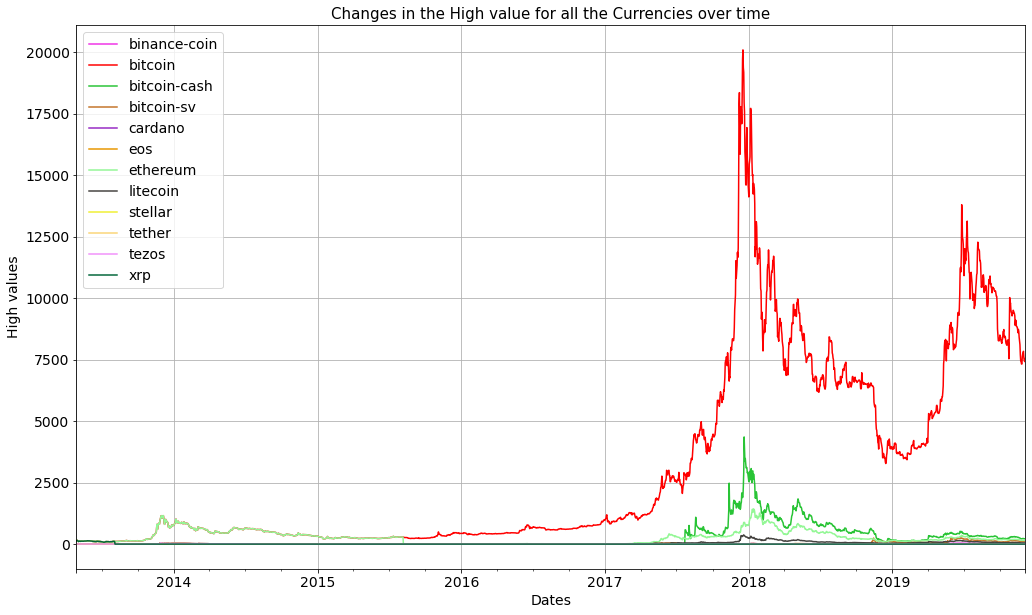

In [89]:
# Creating Plot (line chart), adding grid, assigning 'figsize' (to see a big size plot)
high_value_changes.plot.line(grid='on',figsize=(17, 10),color={"binance-coin": "#f032e7", "bitcoin": "Red", "bitcoin-cash": "#29c436" ,"bitcoin-sv": "#c47429" ,"cardano": "#9629c4" , "eos": "#e89700" ,"ethereum": "#94f796", "litecoin": "#454340", "stellar": "#f0f032" , "tether": "#fad578", "tezos": "#f191fa" , "xrp": "#02663b"})

# Adding Title and assigning title size
pt.title('Changes in the High value for all the Currencies over time', size = 15)

# increasing legend size
pt.legend(loc=2, prop={'size': 14})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 14)
pt.ylabel('High values', size = 14)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 14)
pt.yticks(size = 14)
pt.show()

#### Creating a Subplot to show individual graph to get a good understanding


 	 	 	 Changes in the High value for all the Currencies over time


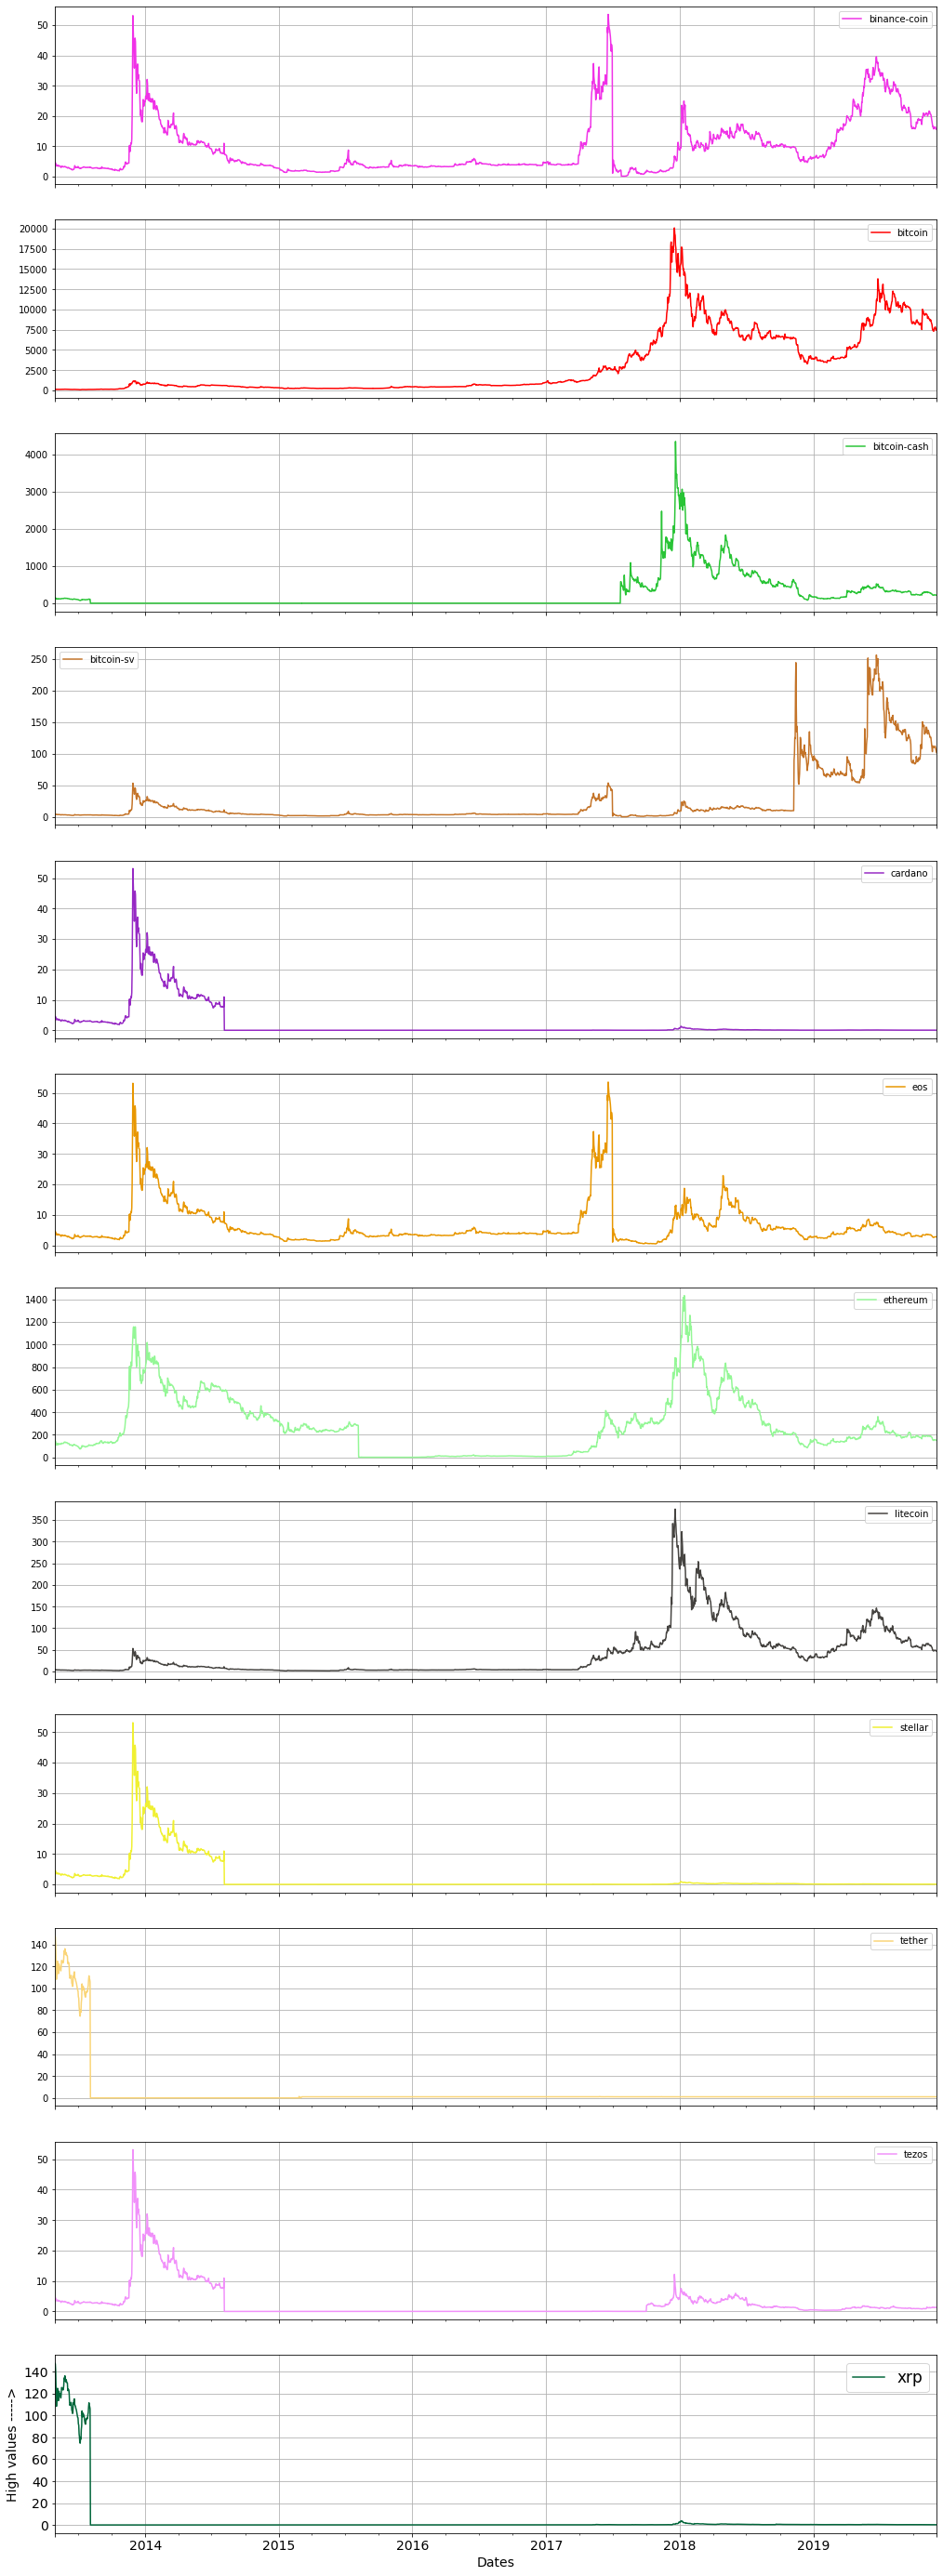

In [90]:
# printing text in bold, adding three tab space in starting
print('\n \t \t \t \033[1m' + 'Changes in the High value for all the Currencies over time')

# creating subplots of line chart and adding grid and also specifying 'figsize'
high_value_changes.plot.line(subplots=True, grid='on', figsize=(17, 50),color={"binance-coin": "#f032e7", "bitcoin": "Red", "bitcoin-cash": "#29c436" ,"bitcoin-sv": "#c47429" ,"cardano": "#9629c4" , "eos": "#e89700" ,"ethereum": "#94f796", "litecoin": "#454340", "stellar": "#f0f032" , "tether": "#fad578", "tezos": "#f191fa" , "xrp": "#02663b"})

# increasing legend size
pt.legend(prop={'size': 17})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 14)
pt.ylabel('High values ----->', size = 14)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 14)
pt.yticks(size = 14)
pt.show()

## For 60+ age group

The graph below shows the changes in the high value for all the currencies over time depicted in an appropriate manner keeping in mind the people who are 60yrs old or above. The font size of the information is increased to 17 in order to be easily visible as elderly people might have difficulty in reading also the graph size is increased. The colours used are muted colours for better viewing. Blue colour is also avoided from the graph as many older people have been identified as having difficulty with understanding the information given using this colour. The line chart is used to represent these information but also individual graphs have been used to show value of each currency for better understanding. The individual graphs are represented using area charts as it is easy to read for the elderly but not used in the whole chart as it would look too overcrowded with information undecipherable hence the use of line chart.

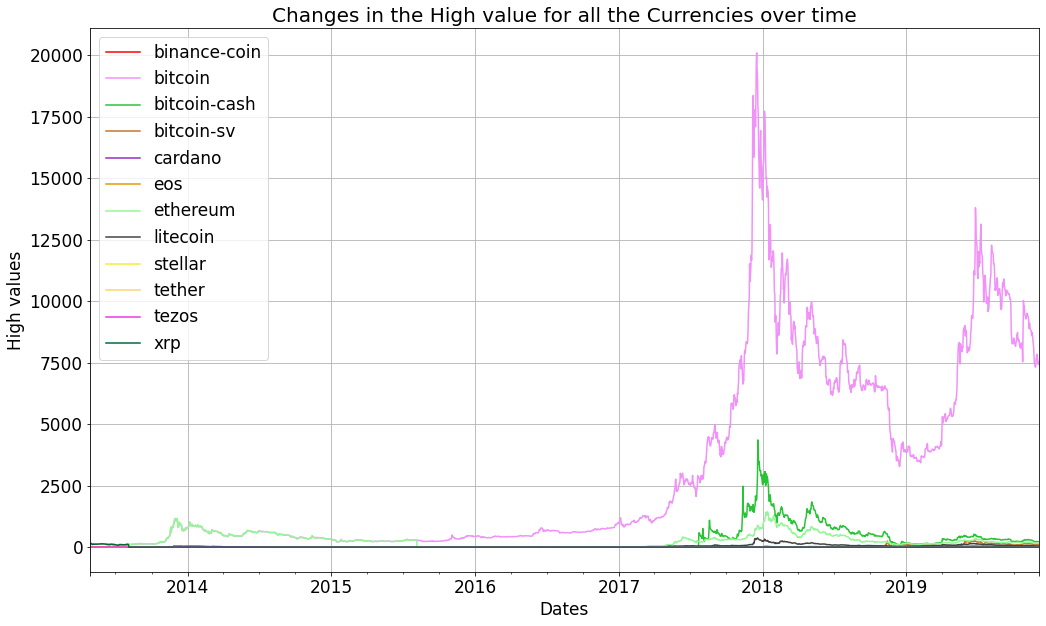

In [91]:
# Creating Plot and adding grid and assigning 'figsize' (to see a big size plot)
high_value_changes.plot.line(grid='on',figsize=(17, 10),stacked=False,color={"binance-coin": "Red", "bitcoin": "#f191fa", "bitcoin-cash": "#29c436" ,"bitcoin-sv": "#c47429" ,"cardano": "#9629c4" , "eos": "#e89700" ,"ethereum": "#94f796", "litecoin": "#454340", "stellar": "#f0f032" , "tether": "#fad578", "tezos": "#f032e7" , "xrp": "#02663b"})

# Adding Title and assigning title size
pt.title('Changes in the High value for all the Currencies over time', size = 20)

# increasing legend size
pt.legend(loc=2, prop={'size': 17})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 17)
pt.ylabel('High values', size = 17)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 17)
pt.yticks(size = 17)
pt.show()

#### Creating a Subplot to show individual graph to get a good understanding


 	 	 	 Changes in the High value for all the Currencies over time


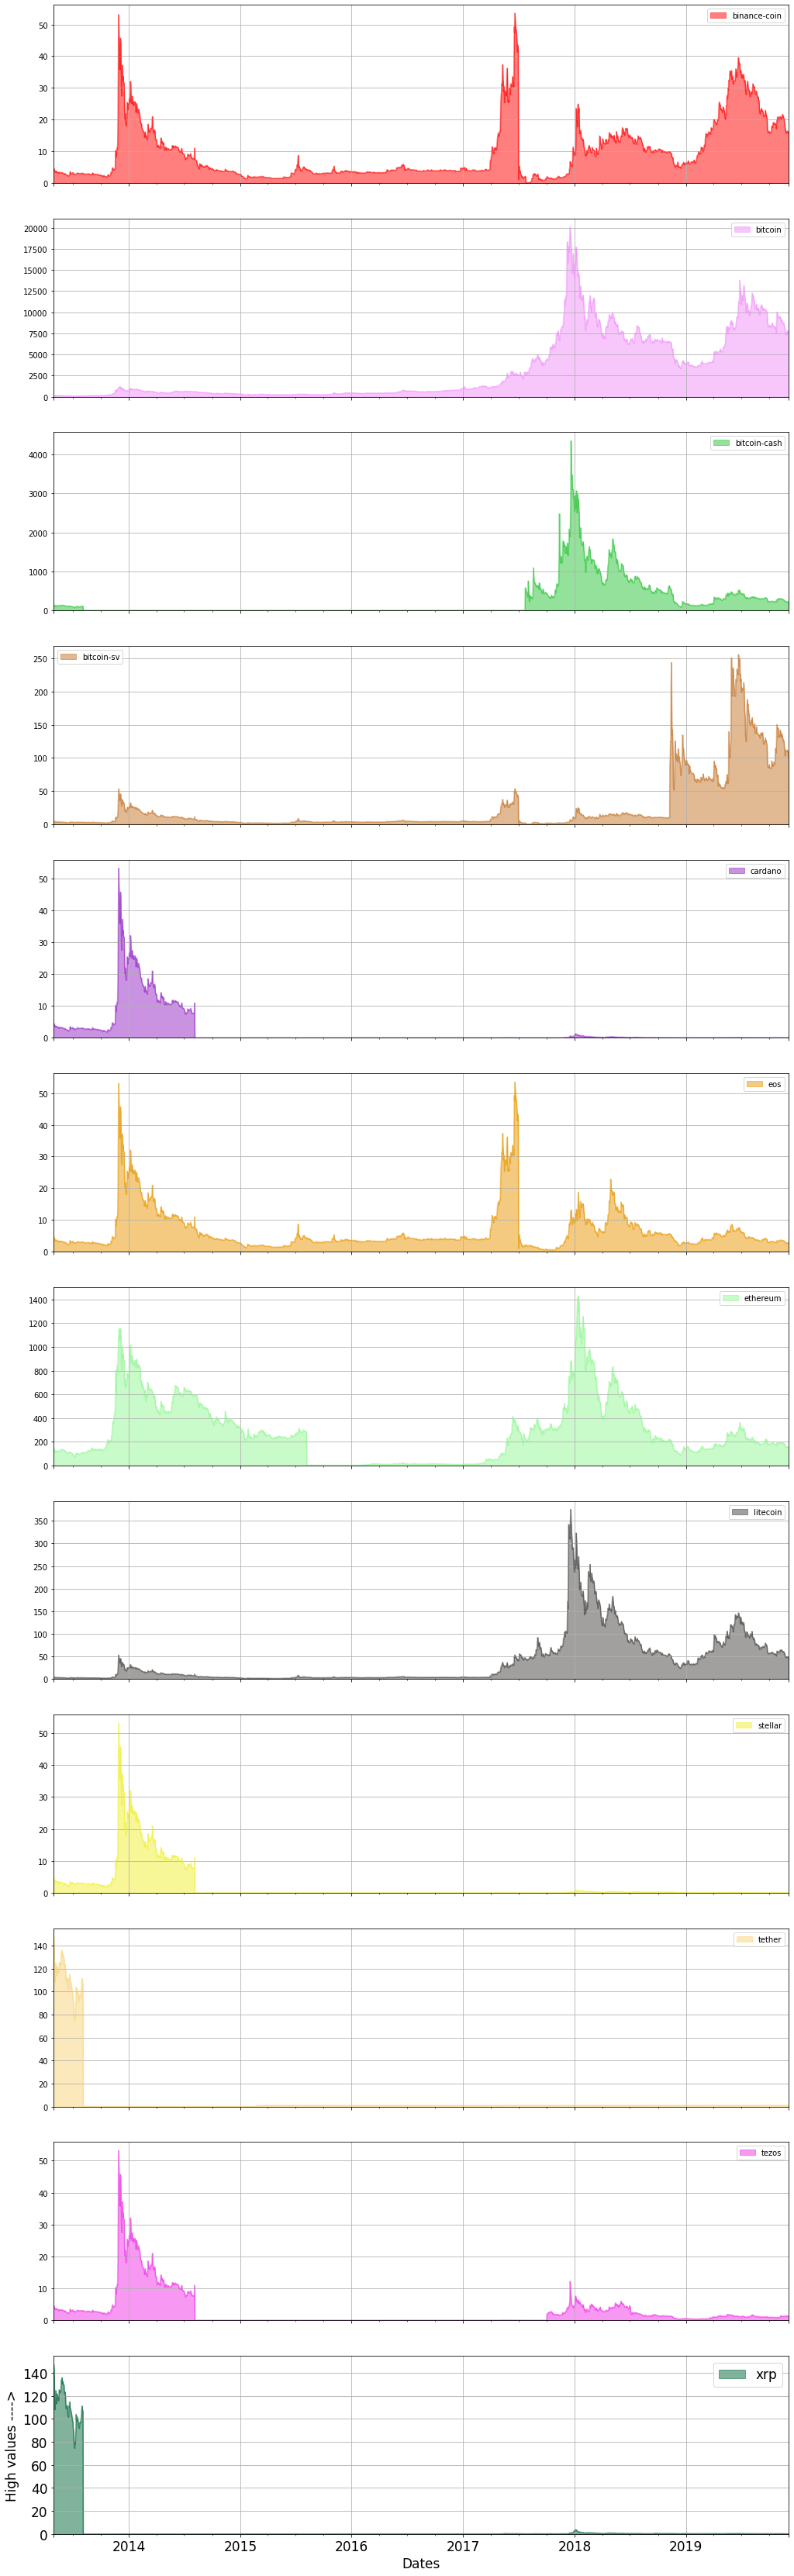

In [92]:
# printing text in bold, adding three tab space in starting, print next line
print('\n \t \t \t \033[1m' + 'Changes in the High value for all the Currencies over time')

# creating subplots and adding grid and also specifying 'figsize'
high_value_changes.plot.area(subplots=True,grid='on', figsize=(17, 60),stacked=False,color={"binance-coin": "Red", "bitcoin": "#f191fa", "bitcoin-cash": "#29c436" ,"bitcoin-sv": "#c47429" ,"cardano": "#9629c4" , "eos": "#e89700" ,"ethereum": "#94f796", "litecoin": "#454340", "stellar": "#f0f032" , "tether": "#fad578", "tezos": "#f032e7" , "xrp": "#02663b"})

# increasing legend size
pt.legend(loc=2, prop={'size': 17})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 17)
pt.ylabel('High values ---->', size = 17)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 17)
pt.yticks(size = 17)

# increasing legend size
pt.legend(prop={'size': 17})
pt.show()

# Solution to Requirement 3

First we are going to check which are the top 3 Currencies by Volume, with and without filter data by date between 2016 and 2019 to see is there any difference

In [93]:
# dropping null value columns to avoid errors 
coin_df.dropna(inplace = True) 

# creating a new data frame
df = coin_df

Finding the top 3 Currencies by Volume

In [94]:
# group by Currency, Date and taking sum of 'High' and storing it to df_1
df_1= df.groupby(['Currency'])[['Volume']].sum()
df_1.reset_index(inplace=True)

# storing the top 3 currency by volume
top_3_Currencies_by_all_year= df_1.nlargest(3,['Volume'])

Finding the top 3 Currencies by Volume between 2016 and 2019

In [95]:
# assign start date and end date
start_date = '2016-01-01'
end_date = '2019-12-31'

# taking data between 2016 and 2019
f_date = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_2 = df.loc[f_date]

# group by Currency, Date and taking sum of 'High' and storing it in df_2
df_2 = df_2.groupby(['Currency'])[['Volume']].sum()
df_2.reset_index(inplace=True)

top_3_Currencies_between_2016_2019= df_2.nlargest(3,['Volume'])

Printing the top 3 Currencies by Volume before and after filter by date

In [96]:
# printing to compare
print('______________________________________________________________________')
print("\n **** Top 3 Currencies by Volume before filter by year **** \n \n", df_1, "\n") 
print('______________________________________________________________________')
print("\n **** Top 3 Currencies by Volume before filter by year **** \n \n", top_3_Currencies_by_all_year, "\n") 
print('______________________________________________________________________')
print("\n **** Top 3 Currencies between 2016 and 2019 by Volume **** \n \n", df_2, "\n") 
print('______________________________________________________________________')
print("\n **** Top 3 Currencies between 2016 and 2019 by Volume **** \n \n",top_3_Currencies_between_2016_2019, "\n")
print('______________________________________________________________________')

______________________________________________________________________

 **** Top 3 Currencies by Volume before filter by year **** 
 
         Currency        Volume
0   binance-coin  1.357148e+11
1        bitcoin  8.681168e+12
2   bitcoin-cash  8.736489e+11
3     bitcoin-sv  1.675303e+11
4        cardano  9.659496e+10
5            eos  1.025573e+12
6       ethereum  3.447802e+12
7       litecoin  1.230496e+12
8        stellar  1.330261e+11
9         tether  6.898083e+12
10         tezos  9.366540e+09
11           xrp  8.413188e+11 

______________________________________________________________________

 **** Top 3 Currencies by Volume before filter by year **** 
 
    Currency        Volume
1   bitcoin  8.681168e+12
9    tether  6.898083e+12
6  ethereum  3.447802e+12 

______________________________________________________________________

 **** Top 3 Currencies between 2016 and 2019 by Volume **** 
 
         Currency        Volume
0   binance-coin  1.322620e+11
1        bitcoin  8

From this its clear the top 3 Currencies by Volume are same with and without filter date between 2016 and 2019, So I am going to take the data between the required year and doing the requirements. 

Taking data between 2016 and 2019

In [97]:
# start date and end date
start_date = '2016-01-01'
end_date = '2019-12-31'

# taking data between 2016 and 2019
filter_date = (coin_df['Date'] >= start_date) & (coin_df['Date'] <= end_date)
coin_df = coin_df.loc[filter_date]

Printing

In [98]:
print('\n_________________________________________________________________________')
print("\n \t \t \t **** DATA **** \n \n", coin_df.head() , "\n") 
print('___________________________________________________________________________')


_________________________________________________________________________

 	 	 	 **** DATA **** 
 
   Currency       Date  Open  High   Low Close      Volume Market Cap
0    tezos 2019-12-04  1.29  1.32  1.25  1.25  46048752.0  824588509
1    tezos 2019-12-03  1.24  1.32  1.21  1.29  41462224.0  853213342
2    tezos 2019-12-02  1.25  1.26   1.2  1.24  27574097.0  817872179
3    tezos 2019-12-01  1.33  1.34  1.25  1.25  24127567.0  828296390
4    tezos 2019-11-30  1.31  1.37  1.31  1.33  28706667.0  879181680 

___________________________________________________________________________


Using 'pivot' to rearrange data for more convenient way to access. 
(taking only required columns [Date, Currency, Volume] and rearrange data)

In [99]:
new_df = coin_df.pivot(index ='Date', columns ='Currency', values ='Volume')

Creating a row with mean value of each column.

In [100]:
new_df.loc['Mean'] = new_df.mean()

Sorting columns of dataframe in descending order based on a 'Mean' row 

In [101]:
sorted_df = new_df.sort_values(by = 'Mean', axis = 1, ascending = False)

select 1st to 3rd column 

In [102]:
top_3_currencies_df = sorted_df[sorted_df.columns[0:3]]

Dropping last row that we created (Mean) using 'drop' to get just top 3 currencies data alone

In [103]:
top_3_currencies_df.drop(top_3_currencies_df.tail(1).index, inplace = True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## For 17-35-year olds

The graph below is prepared for the target audience of 17-35yrs of age. This graph gives the information on the volume of the top 3 currencies between the years 2016-2019. This information is represented using the line graph. Bright colours which are easily visible are used also the font size is kept at 14. In addition to this there are individual line graphs which show the volume for each currency over the mentioned period of time. It is very easy to grasp the information from the chosen visualization as it is quite simple.

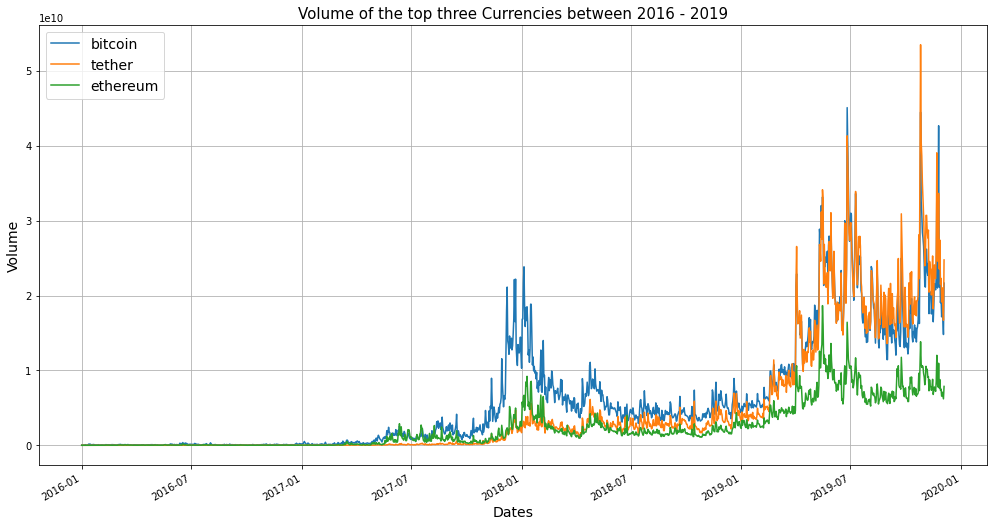

In [104]:
# create plot and add grid, assign 'figsize'
top_3_currencies_df.plot(grid='on', figsize=(17, 9))

# Adding Title and assigning title size
pt.title('Volume of the top three Currencies between 2016 - 2019', size = 15)

# increasing legend size
pt.legend(prop={'size': 14})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 14)
pt.ylabel('Volume', size = 14)
pt.show()


 	 	 	 Volume of the top three Currencies between 2016 - 2019


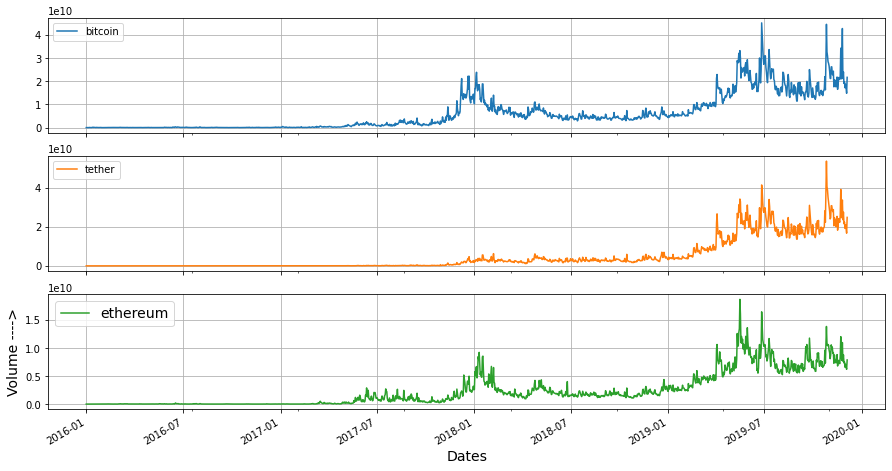

In [105]:
# printing text in bold, adding three tab space in starting
print('\n \t \t \t \033[1m' + 'Volume of the top three Currencies between 2016 - 2019')

# creating subplots and adding grid and also specifying 'figsize'
top_3_currencies_df.plot(subplots=True, grid='on', figsize=(15, 8),stacked=True)

# increasing legend size
pt.legend(prop={'size': 14})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 14)
pt.ylabel('Volume ---->', size = 14)
pt.show()

## For 60+ age group

The below shown graph represents the information on the volume of the top 3 currencies between the years 2016-2019. This information is represented to suit the target audience of the age group of 60yrs and above. The area graph is used to represent the information. The font size is increased to 17 to aid in reading, the colours used are muted colours to suit their visibility also the graph size is increased for better viewing. Along with all these steps individual graphs are also shown below in order to better understand the information for each currency using area graphs.

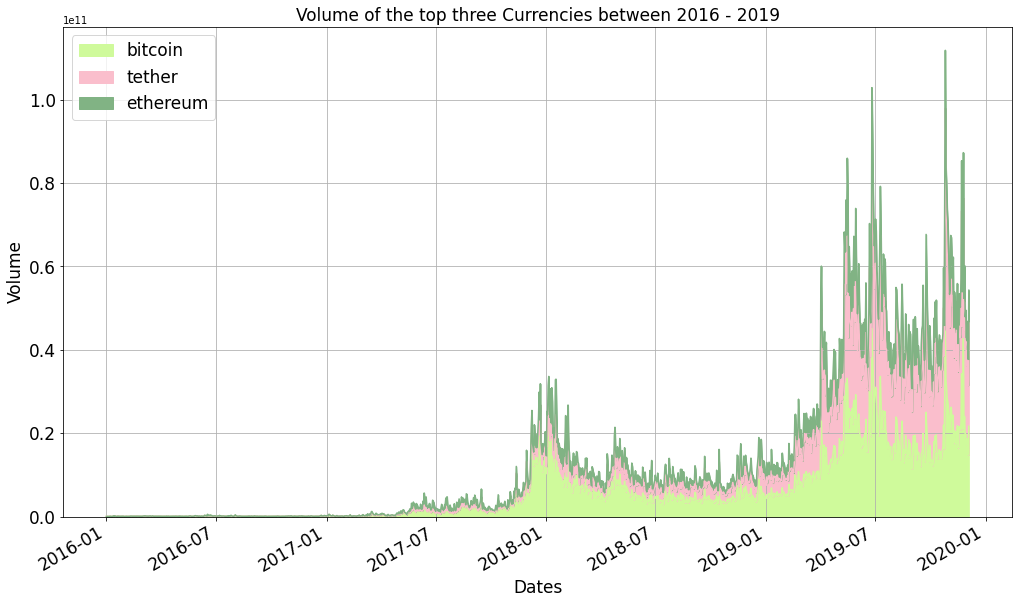

In [107]:
# create plot and add grid, assign 'figsize' and specifying colors
top_3_currencies_df.plot.area(grid='on', figsize=(17, 10),color={"bitcoin": "#cffa9b", "tether": "#fabecc", "ethereum": "#81b384"})

# increasing legend size
pt.legend(loc=2, prop={'size': 17})

# Adding Title and assigning title size
pt.title('Volume of the top three Currencies between 2016 - 2019', size = 17)

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 17)
pt.ylabel('Volume', size = 17)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 17)
pt.yticks(size = 17)
pt.show()


 	 	 	 Volume of the top three Currencies between 2016 - 2019


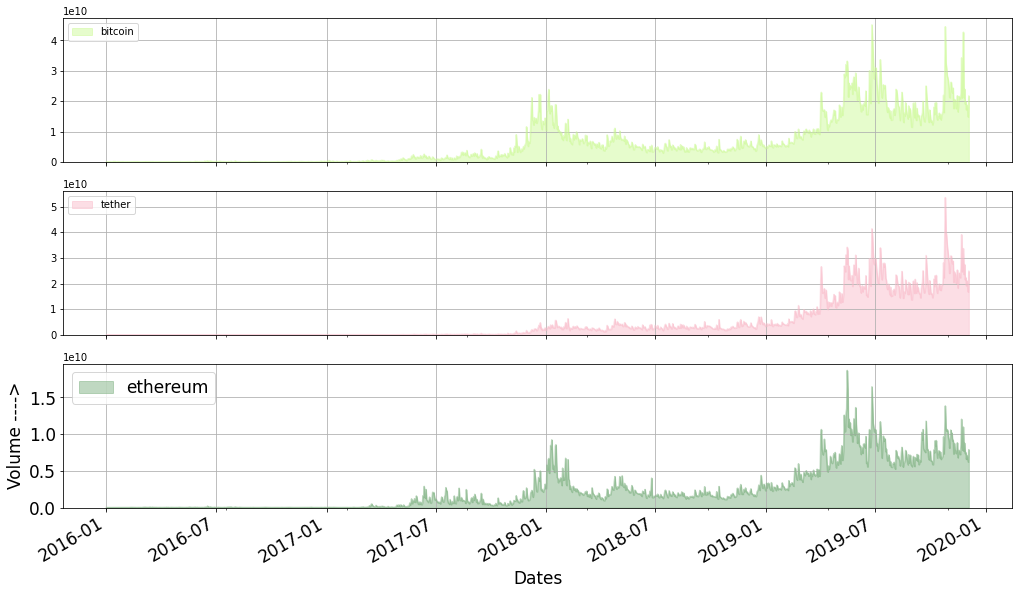

In [75]:
# printing text in bold, adding three tab space in starting
print('\n \t \t \t \033[1m' + 'Volume of the top three Currencies between 2016 - 2019')

# creating subplots for a better understanding
top_3_currencies_df.plot.area(subplots=True,stacked=False,grid='on', figsize=(17, 10),color={"bitcoin": "#cffa9b", "tether": "#fabecc", "ethereum": "#81b384"})

# increasing legend size
pt.legend(loc=2, prop={'size': 17})

# Adding 'X' and 'Y' labels and assigning label size
pt.xlabel('Dates', size = 17)
pt.ylabel('Volume ---->', size = 17)

# Assigning 'X' and 'Y' ticks size
pt.xticks(size = 17)
pt.yticks(size = 17)
pt.show()

# Bibliography

GeeksforGeeks, 2020a. Remove last n rows of a Pandas DataFrame. GeeksforGeeks. URL https://www.geeksforgeeks.org/remove-last-n-rows-of-a-pandas-dataframe/ (accessed 12.30.20).

GeeksforGeeks, 2020b. Sort rows or columns in Pandas Dataframe based on values. GeeksforGeeks. URL https://www.geeksforgeeks.org/sort-rows-or-columns-in-pandas-dataframe-based-on-values/ (accessed 12.30.20).

Hoang, Q., 2020. python - Drop columns for highest values in final row in pandas [WWW Document]. Stack Overflow. URL https://stackoverflow.com/questions/61378508/drop-columns-for-highest-values-in-final-row-in-pandas (accessed 12.30.20).

Lynn, S., 2020. Pandas Groupby: Summarising, Aggregating, and Grouping data in Python | Shane Lynn [WWW Document]. URL https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ (accessed 12.27.20).

Pandas, 2020a. pandas.DataFrame.astype — pandas 1.2.0 documentation [WWW Document]. URL https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html (accessed 12.26.20).

Pandas, 2020b. pandas.DataFrame.pivot — pandas 1.2.0 documentation [WWW Document]. URL https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html (accessed 12.29.20).

Pandas, 2020c. Plotting with matplotlib — pandas 0.13.1 documentation [WWW Document]. URL https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html (accessed 12.30.20).

Pandas, 2020d. Visualization — pandas 1.2.0 documentation [WWW Document]. URL https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html (accessed 12.31.20).

Paulo, J., 2014. python - how to make the text size of the x and y axis labels and the title on matplotlib and prettyplotlib graphs bigger [WWW Document]. Stack Overflow. URL https://stackoverflow.com/questions/27350226/how-to-make-the-text-size-of-the-x-and-y-axis-labels-and-the-title-on-matplotlib (accessed 12.31.20).

The Clare, 2015. Color Therapy for Seniors: Boost Your Mood in Every Season [WWW Document]. The Clare. URL https://theclare.com/color-therapy-for-seniors/ (accessed 1.1.21).

Wang, J., Unutbu, 2019. python - Select DataFrame rows between two dates [WWW Document]. Stack Overflow. URL https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates (accessed 12.27.20).

